# Entropy "model"

## Imports

In [ ]:
from glob import glob
import json
import numpy as np
from os.path import basename
import pandas as pd
import PIL
import scipy.stats
import skimage.filters.rank
from skimage.morphology import disk

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style("dark", {'axes.grid' : False})
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load data

In [4]:
app_ui_exp = pd.read_pickle('app_ui_exp.pkl')
app_ui_exp.shape

(70959, 12)

In [5]:
app_ui_exp.head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio
0,B4A.BigFivePersonalityTest,Big 5 Personality Test,Education,3.6,6698.000000,1000000.0,[../app_uis/49783.jpg],1,../app_uis/49783.jpg,1080,1920,0.5625
1,CN.MyPrivateMessages,Calculator,Communication,4.3,16952.333333,1000000.0,[../app_uis/26083.jpg],1,../app_uis/26083.jpg,1080,1920,0.5625


In [61]:
app_ui_exp.app_category.value_counts()

app_category
Entertainment              5771
Shopping                   4593
Social                     4499
Lifestyle                  4210
Health & Fitness           4150
Education                  4146
News & Magazines           4137
Communication              4005
Travel & Local             3727
Sports                     3698
Books & Reference          3695
Music & Audio              3129
Weather                    3113
Finance                    2639
Business                   2331
Medical                    2093
Maps & Navigation          1997
Food & Drink               1863
Video Players & Editors    1266
Dating                     1258
Comics                     1241
Parenting                   844
Auto & Vehicles             820
House & Home                665
Beauty                      513
Art & Design                372
Events                      178
Productivity                  6
Name: count, dtype: int64

#### Resize screenshots to a more manageable size for entropy calculation using below script

In [13]:
! cat resize.py

cat: resize.py: No such file or directory


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Add column in dataframe for filepaths to resized images

In [18]:
import zipfile

with zipfile.ZipFile('/content/drive/My Drive/app_uis_resized.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/resized')

In [7]:
app_ui_exp['resized_file'] = app_ui_exp.filename_exp.map(lambda x: '/content/drive/My Drive/resized/app_uis_resized/' + basename(x))
app_ui_exp.head()

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file
0,B4A.BigFivePersonalityTest,Big 5 Personality Test,Education,3.6,6698.000000,1000000.0,[../app_uis/49783.jpg],1,../app_uis/49783.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...
1,CN.MyPrivateMessages,Calculator,Communication,4.3,16952.333333,1000000.0,[../app_uis/26083.jpg],1,../app_uis/26083.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...
2,DOCECG2.doctor,Electrocardiogram ECG Types,Medical,3.9,4134.500000,500000.0,[../app_uis/51036.jpg],1,../app_uis/51036.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...
3,Gecko.Droid.PhysicsHelper,Pocket Physics,Education,4.1,15938.000000,1000000.0,"[../app_uis/29868.jpg, ../app_uis/29869.jpg, ....",5,../app_uis/29868.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...
4,Gecko.Droid.PhysicsHelper,Pocket Physics,Education,4.1,15938.000000,1000000.0,"[../app_uis/29868.jpg, ../app_uis/29869.jpg, ....",5,../app_uis/29869.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...


## Calculate histograms & entropies

#### Sample data

In [8]:
app_ui_exp.sample()

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file
11977,com.cg.android.pregnancytracker,Pregnancy Tracker,Medical,4.4,223.0,10000.0,"[../app_uis/68827.jpg, ../app_uis/68831.jpg, ....",12,../app_uis/68828.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...


#### Add column in dataframe for grayscale histograms

In [9]:
def gs_histogram(filepath):
    return PIL.Image.open(filepath).convert('L').histogram()

In [10]:
app_ui_exp['gs_histogram'] = app_ui_exp.resized_file.map(lambda x: gs_histogram(x))

In [11]:
app_ui_exp.head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram
0,B4A.BigFivePersonalityTest,Big 5 Personality Test,Education,3.6,6698.000000,1000000.0,[../app_uis/49783.jpg],1,../app_uis/49783.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[7327, 1030, 557, 286, 303, 475, 160, 155, 95,..."
1,CN.MyPrivateMessages,Calculator,Communication,4.3,16952.333333,1000000.0,[../app_uis/26083.jpg],1,../app_uis/26083.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[9609, 626, 310, 1090, 264, 699, 1081, 426, 41..."


In [12]:
len(app_ui_exp.gs_histogram[0])

256

#### Add column in dataframe for grayscale entropies

In [13]:
def ui_entropy(vector):
    probabilities = [(float(i)/sum(vector)) for i in vector]
    return -sum([p * np.log2(p) for p in probabilities if p != 0])

In [14]:
app_ui_exp['gs_ent'] = app_ui_exp.gs_histogram.map(lambda x: ui_entropy(x))

In [15]:
app_ui_exp.head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent
0,B4A.BigFivePersonalityTest,Big 5 Personality Test,Education,3.6,6698.000000,1000000.0,[../app_uis/49783.jpg],1,../app_uis/49783.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[7327, 1030, 557, 286, 303, 475, 160, 155, 95,...",4.215254
1,CN.MyPrivateMessages,Calculator,Communication,4.3,16952.333333,1000000.0,[../app_uis/26083.jpg],1,../app_uis/26083.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[9609, 626, 310, 1090, 264, 699, 1081, 426, 41...",6.826821


#### Add column in dataframe for color histograms

In [16]:
def c_histogram(filepath):
    return PIL.Image.open(filepath).histogram()

In [17]:
app_ui_exp['c_histogram'] = app_ui_exp.resized_file.map(lambda x: c_histogram(x))

In [20]:
app_ui_exp.head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent
0,B4A.BigFivePersonalityTest,Big 5 Personality Test,Education,3.6,6698.000000,1000000.0,[../app_uis/49783.jpg],1,../app_uis/49783.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[7327, 1030, 557, 286, 303, 475, 160, 155, 95,...",4.215254,"[7555, 755, 385, 443, 201, 372, 187, 117, 92, ...",5.846263
1,CN.MyPrivateMessages,Calculator,Communication,4.3,16952.333333,1000000.0,[../app_uis/26083.jpg],1,../app_uis/26083.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[9609, 626, 310, 1090, 264, 699, 1081, 426, 41...",6.826821,"[9609, 626, 310, 1090, 264, 699, 1081, 426, 41...",8.411783


In [21]:
len(app_ui_exp.c_histogram[0])

768

#### Add column in dataframe for color entropies

In [22]:
app_ui_exp['c_ent'] = app_ui_exp.c_histogram.map(lambda x: ui_entropy(x))

In [23]:
app_ui_exp.head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent
0,B4A.BigFivePersonalityTest,Big 5 Personality Test,Education,3.6,6698.000000,1000000.0,[../app_uis/49783.jpg],1,../app_uis/49783.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[7327, 1030, 557, 286, 303, 475, 160, 155, 95,...",4.215254,"[7555, 755, 385, 443, 201, 372, 187, 117, 92, ...",5.846263
1,CN.MyPrivateMessages,Calculator,Communication,4.3,16952.333333,1000000.0,[../app_uis/26083.jpg],1,../app_uis/26083.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[9609, 626, 310, 1090, 264, 699, 1081, 426, 41...",6.826821,"[9609, 626, 310, 1090, 264, 699, 1081, 426, 41...",8.411783


#### Add column for Information Gain
from going to a larger state space (3 color channels) to a smaller state space (grayscale)

In [24]:
app_ui_exp['info_gain'] = app_ui_exp.c_ent - app_ui_exp.gs_ent

In [25]:
app_ui_exp.head()

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent,info_gain
0,B4A.BigFivePersonalityTest,Big 5 Personality Test,Education,3.6,6698.000000,1000000.0,[../app_uis/49783.jpg],1,../app_uis/49783.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[7327, 1030, 557, 286, 303, 475, 160, 155, 95,...",4.215254,"[7555, 755, 385, 443, 201, 372, 187, 117, 92, ...",5.846263,1.631009
1,CN.MyPrivateMessages,Calculator,Communication,4.3,16952.333333,1000000.0,[../app_uis/26083.jpg],1,../app_uis/26083.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[9609, 626, 310, 1090, 264, 699, 1081, 426, 41...",6.826821,"[9609, 626, 310, 1090, 264, 699, 1081, 426, 41...",8.411783,1.584963
2,DOCECG2.doctor,Electrocardiogram ECG Types,Medical,3.9,4134.500000,500000.0,[../app_uis/51036.jpg],1,../app_uis/51036.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[7576, 4147, 985, 867, 2193, 2554, 2593, 1189,...",5.157405,"[9463, 2228, 771, 2105, 2739, 2483, 1159, 369,...",7.328633,2.171227
3,Gecko.Droid.PhysicsHelper,Pocket Physics,Education,4.1,15938.000000,1000000.0,"[../app_uis/29868.jpg, ../app_uis/29869.jpg, ....",5,../app_uis/29868.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[6653, 861, 320, 54, 37, 22, 35, 37, 18, 22, 1...",2.268574,"[6849, 914, 385, 136, 100, 109, 133, 179, 228,...",3.885312,1.616738
4,Gecko.Droid.PhysicsHelper,Pocket Physics,Education,4.1,15938.000000,1000000.0,"[../app_uis/29868.jpg, ../app_uis/29869.jpg, ....",5,../app_uis/29869.jpg,1080,1920,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[7193, 321, 50, 54, 307, 22, 35, 37, 18, 22, 1...",4.237044,"[7475, 379, 140, 159, 409, 164, 199, 288, 199,...",5.832029,1.594985


#### Save resulting dataframe
Calculating these histograms and entropies took a long time to run!

In [ ]:
app_ui_exp.to_pickle('../clean_data/app_ui_ents.pkl')

## Analysis

### Entropy Distribution for grayscale images

In [26]:
app_ui_exp.gs_ent.describe()

count    70959.000000
mean         4.606740
std          1.531407
min         -0.000000
25%          3.438294
50%          4.578540
75%          5.802933
max          7.879552
Name: gs_ent, dtype: float64

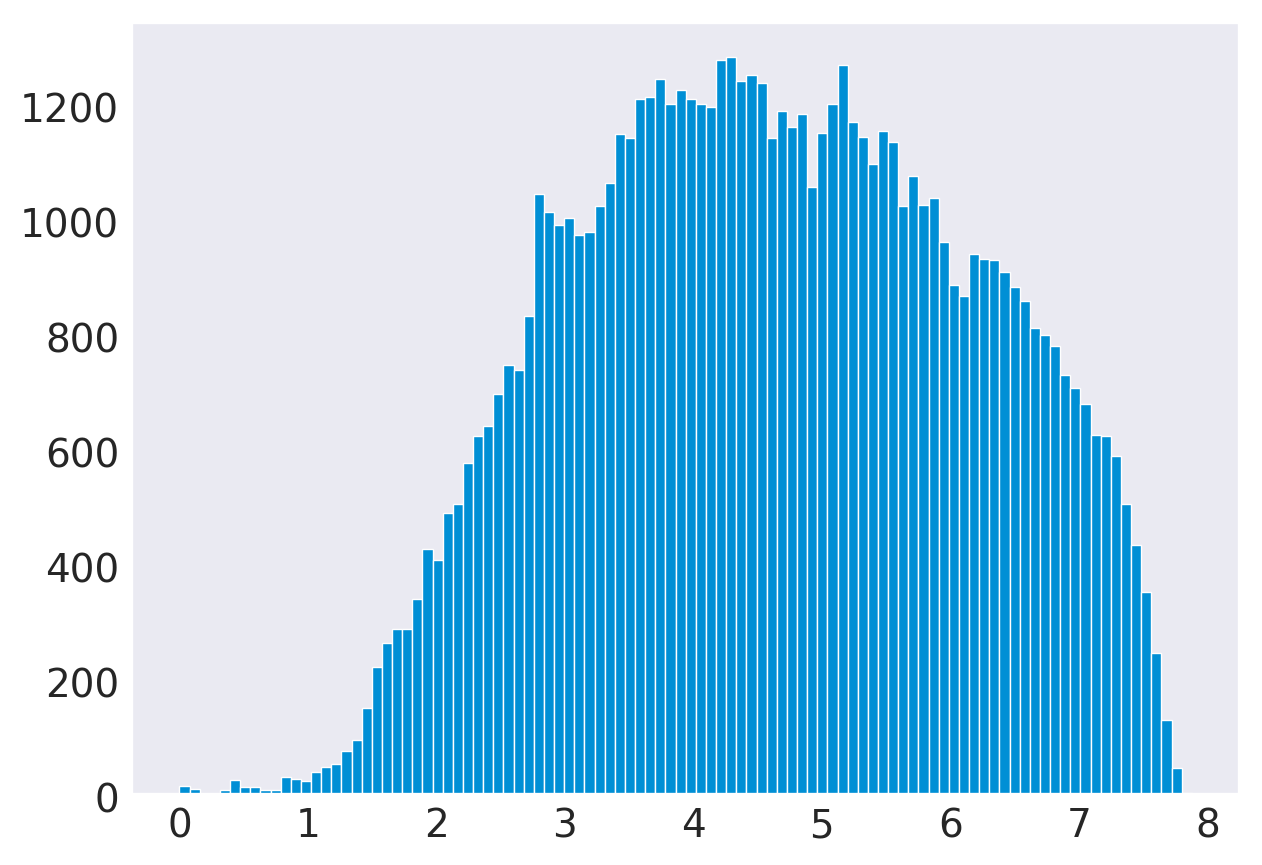

In [27]:
plt.hist(app_ui_exp.gs_ent, bins=100);

#### Lowest entropy grayscale image

In [28]:
app_ui_exp[app_ui_exp.gs_ent == 0].head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent,info_gain
15137,com.designmantic,Logo Maker by DesignMantic,Business,3.1,6006.0,1000000.0,"[../app_uis/50792.jpg, ../app_uis/50786.jpg, ....",8,../app_uis/50788.jpg,1920,1080,1.777778,/content/drive/My Drive/resized/app_uis_resize...,"[129600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-0.0,"[129600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.584963,1.584963
27390,com.inglesdivino.imagestovideo,Photos To Video,Video Players & Editors,3.7,6213.0,1000000.0,"[../app_uis/70123.jpg, ../app_uis/70124.jpg, ....",9,../app_uis/70117.jpg,1080,1920,0.562500,/content/drive/My Drive/resized/app_uis_resize...,"[129600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-0.0,"[129600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.584963,1.584963


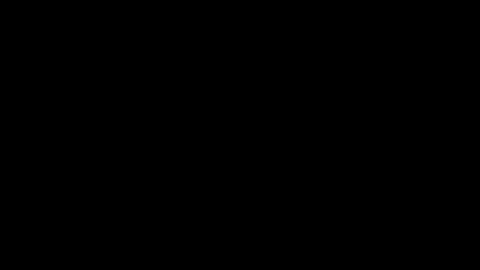

In [29]:
PIL.Image.open(app_ui_exp.resized_file[15137]).convert('L')

#### Highest entropy grayscale image

In [30]:
app_ui_exp[app_ui_exp.gs_ent > 7.88].head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent,info_gain


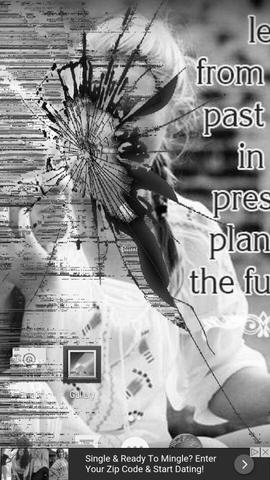

In [31]:
PIL.Image.open(app_ui_exp.resized_file[66456]).convert('L')

### Entropy Distribution for color images

In [32]:
app_ui_exp.c_ent.describe()

count    70959.000000
mean         6.212366
std          1.511606
min          1.584963
25%          5.062152
50%          6.205423
75%          7.398535
max          9.427207
Name: c_ent, dtype: float64

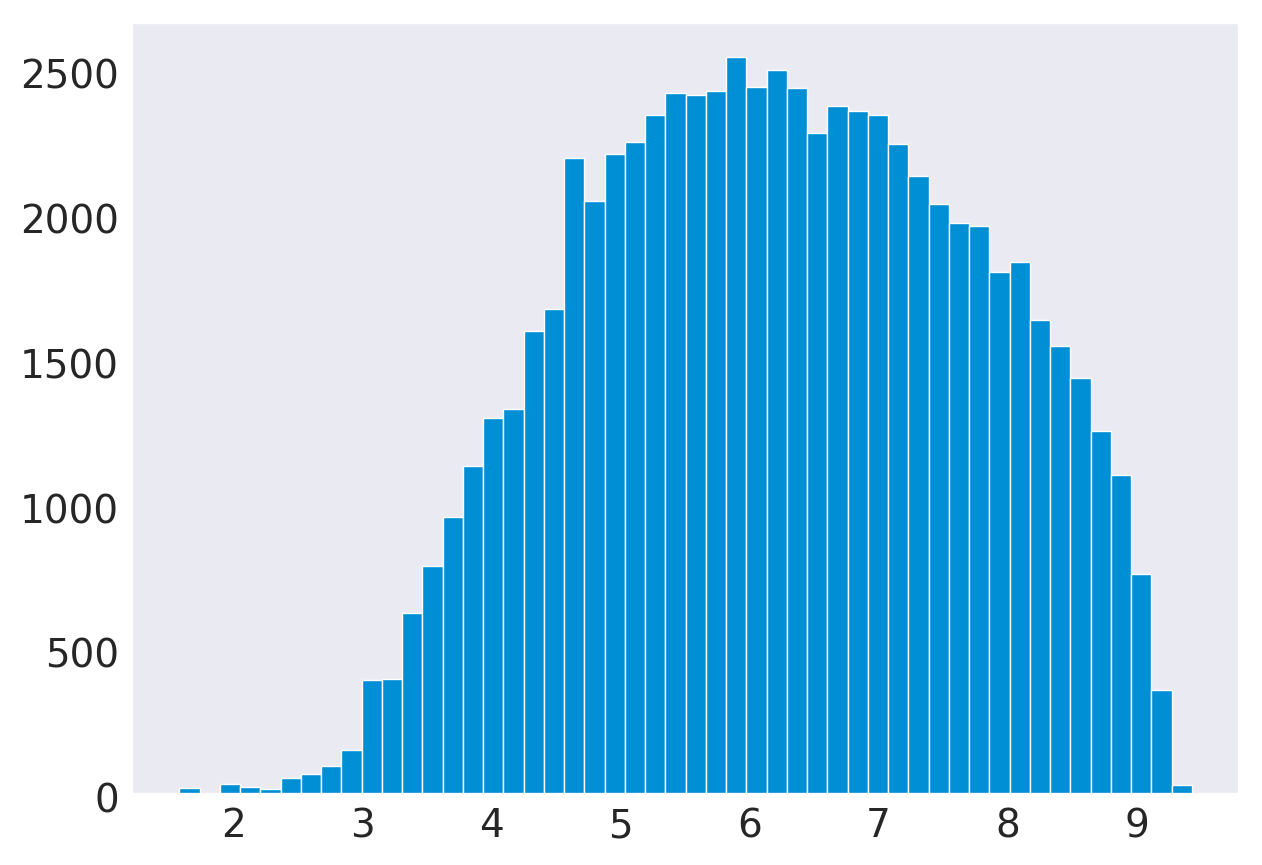

In [33]:
plt.hist(app_ui_exp.c_ent, bins=50);

#### Lowest entropy color image

In [34]:
app_ui_exp[app_ui_exp.c_ent < 1.59].head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent,info_gain
15137,com.designmantic,Logo Maker by DesignMantic,Business,3.1,6006.0,1000000.0,"[../app_uis/50792.jpg, ../app_uis/50786.jpg, ....",8,../app_uis/50788.jpg,1920,1080,1.777778,/content/drive/My Drive/resized/app_uis_resize...,"[129600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-0.0,"[129600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.584963,1.584963
27390,com.inglesdivino.imagestovideo,Photos To Video,Video Players & Editors,3.7,6213.0,1000000.0,"[../app_uis/70123.jpg, ../app_uis/70124.jpg, ....",9,../app_uis/70117.jpg,1080,1920,0.562500,/content/drive/My Drive/resized/app_uis_resize...,"[129600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-0.0,"[129600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.584963,1.584963


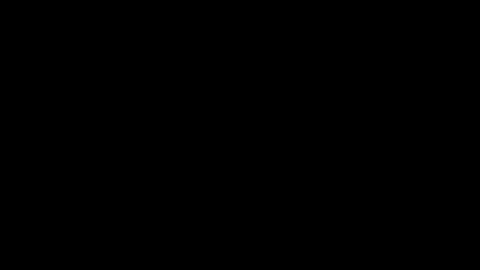

In [35]:
# same image as above for grayscale
# likely the extremes here won't vary much
PIL.Image.open(app_ui_exp.resized_file[15137])

#### Highest entropy color image

In [36]:
app_ui_exp[app_ui_exp.c_ent > 9.4].head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent,info_gain
66456,net.kreci.crackedscreen,Cracked Screen Prank,Entertainment,3.6,5311.0,1000000.0,"[../app_uis/16785.jpg, ../app_uis/16784.jpg, ....",3,../app_uis/16785.jpg,540,960,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[3, 11, 20, 27, 38, 40, 36, 45, 48, 59, 86, 81...",7.879552,"[43, 13, 12, 14, 19, 23, 27, 34, 48, 26, 50, 5...",9.427207,1.547655
66457,net.kreci.crackedscreen,Cracked Screen Prank,Entertainment,3.6,5311.0,1000000.0,"[../app_uis/16785.jpg, ../app_uis/16784.jpg, ....",3,../app_uis/16784.jpg,540,960,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[3, 11, 25, 25, 33, 39, 34, 45, 49, 60, 86, 72...",7.855810,"[48, 13, 12, 14, 18, 22, 29, 33, 49, 26, 48, 5...",9.413456,1.557647


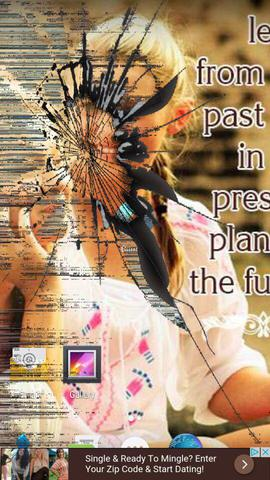

In [37]:
# same image as above for color
PIL.Image.open(app_ui_exp.resized_file[66456])

### Entropy with regards to app category

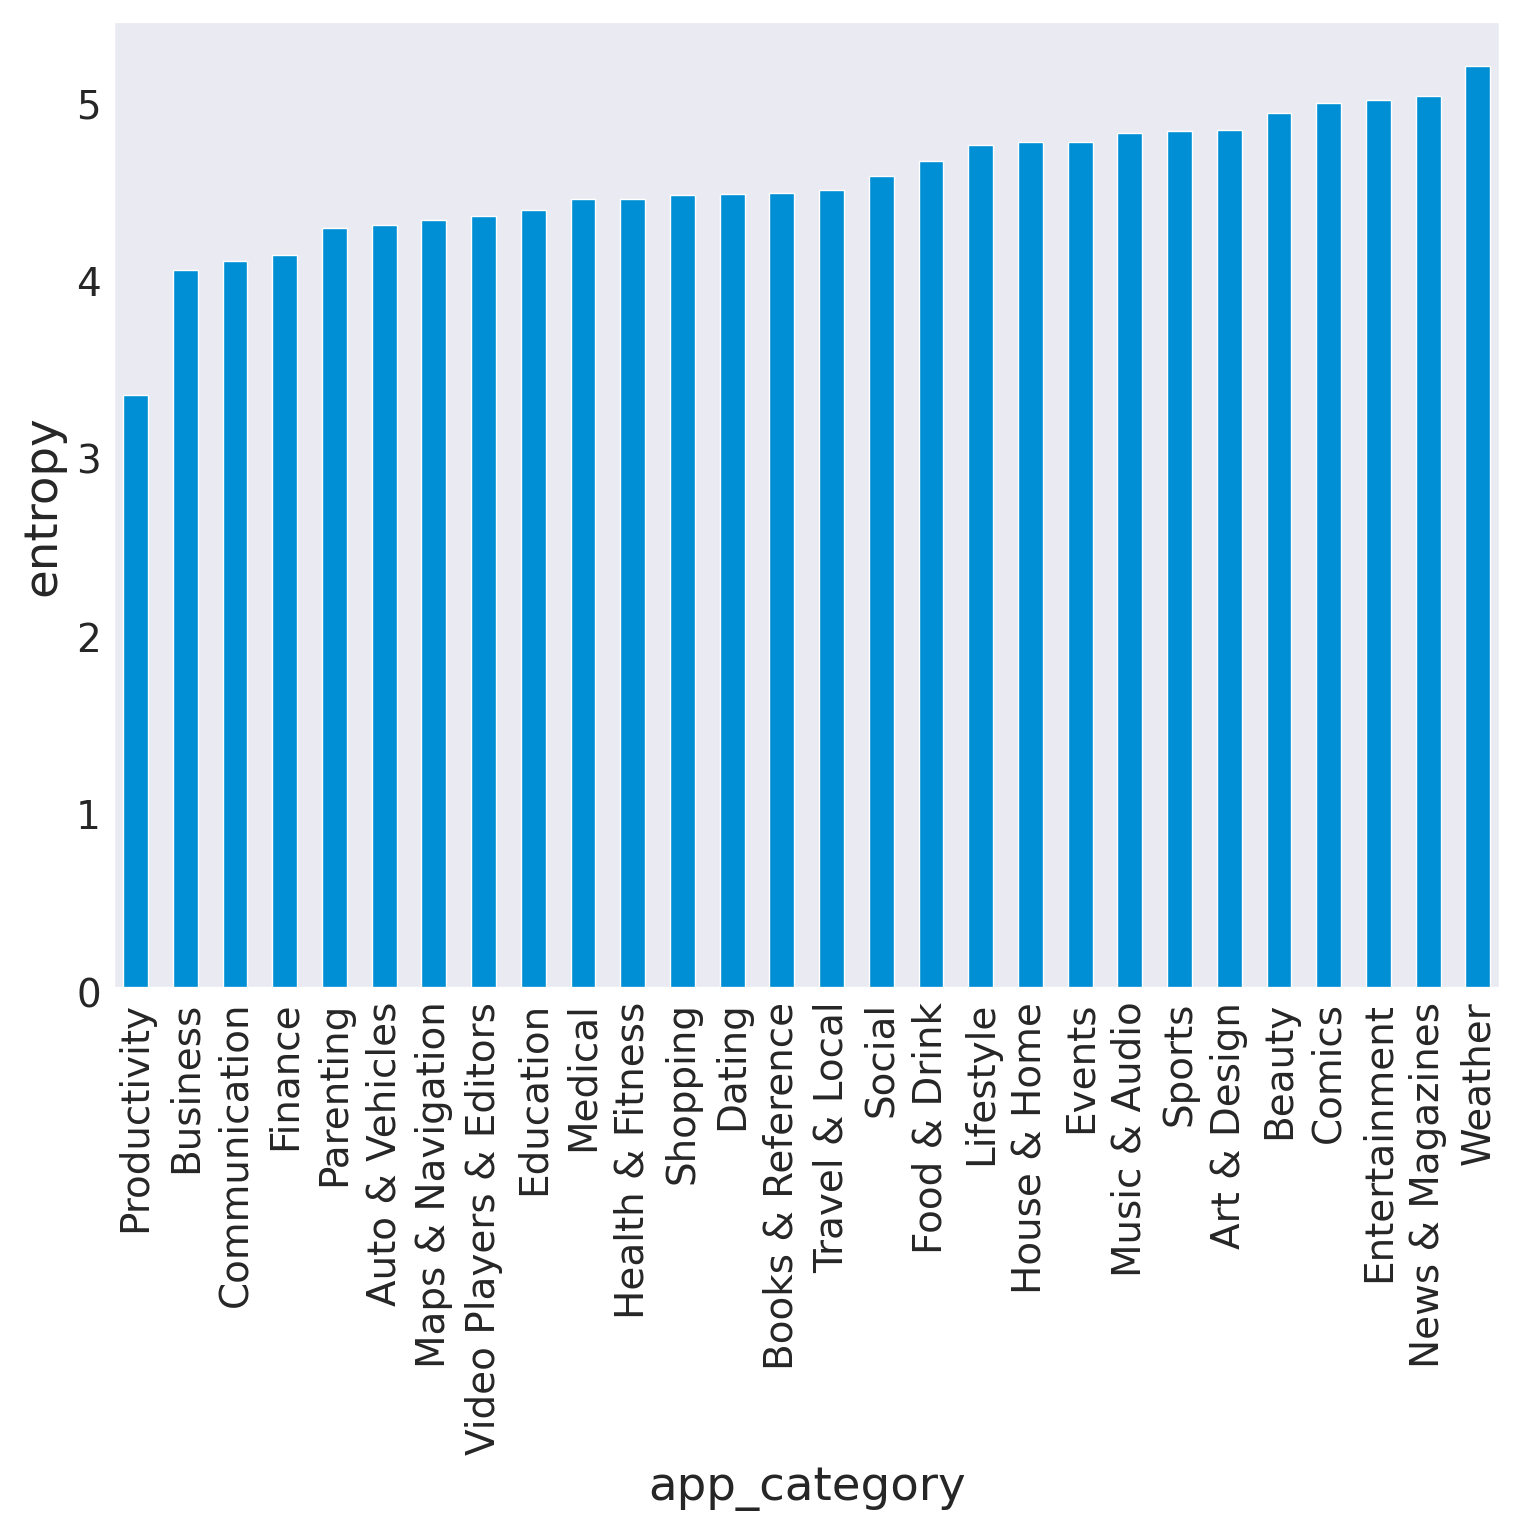

In [38]:
app_ui_exp.groupby('app_category')['gs_ent'].mean().sort_values().plot.bar(figsize=(8,6)).set_ylabel('entropy');

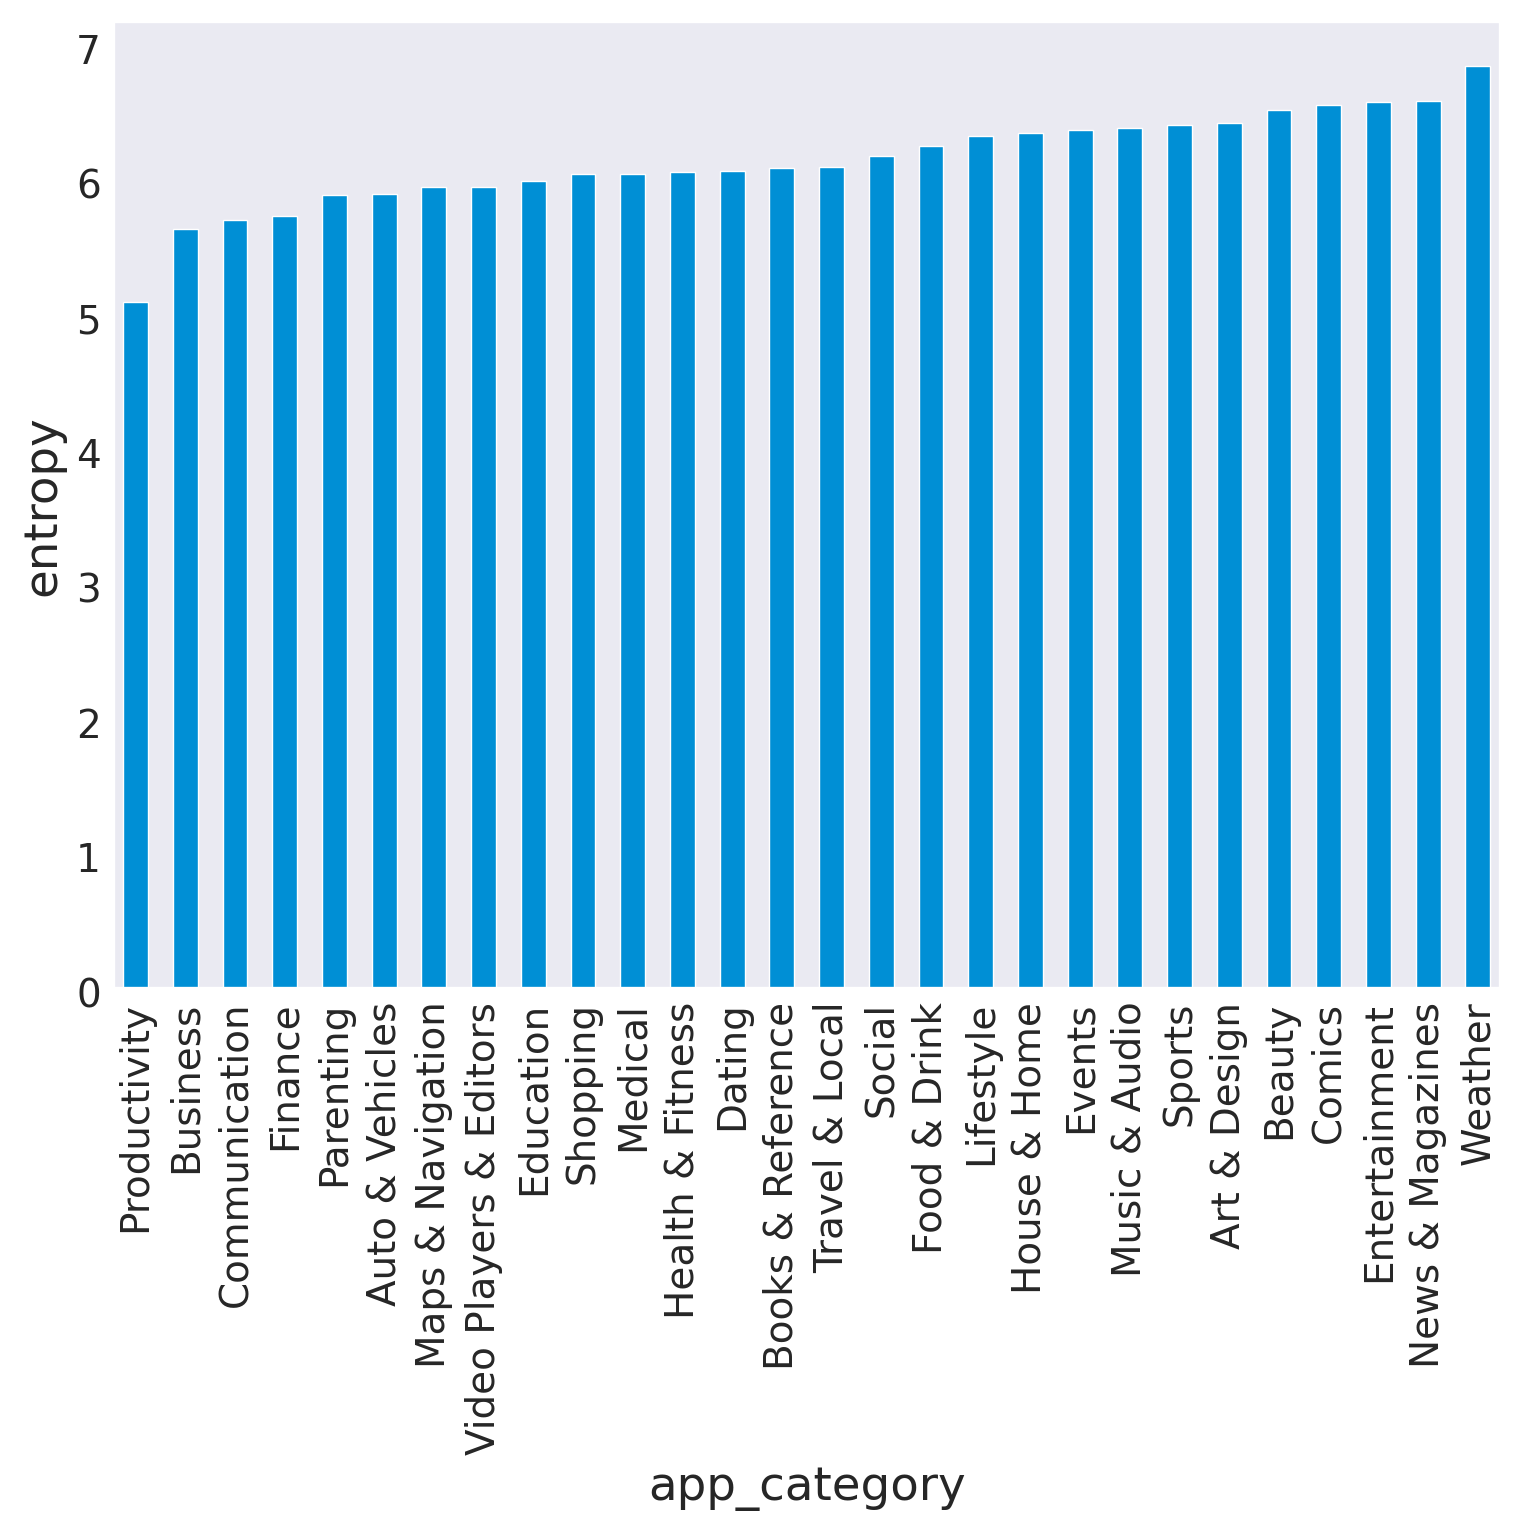

In [39]:
app_ui_exp.groupby('app_category')['c_ent'].mean().sort_values().plot.bar(figsize=(8,6)).set_ylabel('entropy');

#### Lowest entropy image in Productivity category

In [40]:
app_ui_exp[app_ui_exp.app_category == 'Productivity'].sort_values(by='gs_ent').head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent,info_gain
45717,com.sftx.repost,Repost for Instagram RepostIt,Productivity,4.1,25836.0,1000000.0,"[../app_uis/38953.jpg, ../app_uis/38949.jpg, ....",6,../app_uis/38951.jpg,540,960,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[6597, 585, 44, 43, 314, 35, 43, 37, 303, 38, ...",2.691414,"[6597, 585, 44, 43, 314, 35, 43, 37, 303, 38, ...",4.387520,1.696106
45720,com.sftx.repost,Repost for Instagram RepostIt,Productivity,4.1,25836.0,1000000.0,"[../app_uis/38953.jpg, ../app_uis/38949.jpg, ....",6,../app_uis/38952.jpg,540,960,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[6091, 77, 800, 322, 294, 289, 41, 30, 32, 40,...",2.766751,"[7849, 1207, 1498, 713, 604, 451, 262, 142, 22...",4.910319,2.143569


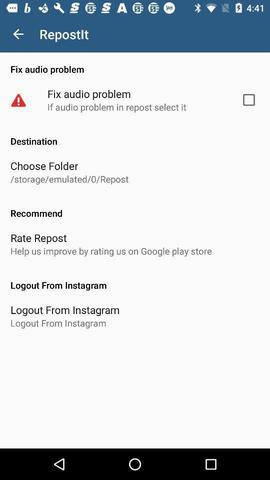

In [41]:
PIL.Image.open(app_ui_exp.resized_file[45717])

#### Highest entropy image in Weather category

In [42]:
app_ui_exp[app_ui_exp.app_category == 'Weather'].sort_values(by='gs_ent', ascending=False).head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent,info_gain
64351,local.weather.forecast.pro,Weather Ultimate,Weather,4.2,76745.666667,1000000.0,"[../app_uis/46065.jpg, ../app_uis/46068.jpg, ....",5,../app_uis/46068.jpg,540,960,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[7926, 862, 636, 370, 358, 406, 301, 243, 233,...",7.754440,"[8548, 687, 534, 452, 380, 442, 334, 287, 290,...",9.319477,1.565038
64354,local.weather.forecast.pro,Weather Ultimate,Weather,4.2,76745.666667,1000000.0,"[../app_uis/46065.jpg, ../app_uis/46068.jpg, ....",5,../app_uis/46069.jpg,540,960,0.5625,/content/drive/My Drive/resized/app_uis_resize...,"[8080, 803, 595, 412, 363, 362, 245, 232, 201,...",7.750122,"[8624, 665, 524, 458, 379, 404, 306, 261, 279,...",9.319666,1.569544


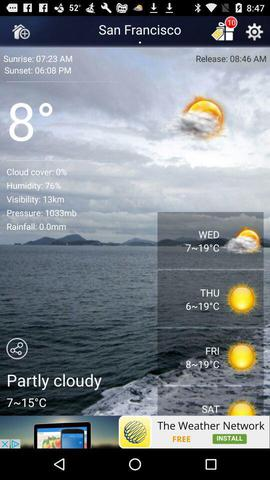

In [43]:
PIL.Image.open(app_ui_exp.resized_file[64351])

### Entropy with regards to star rating

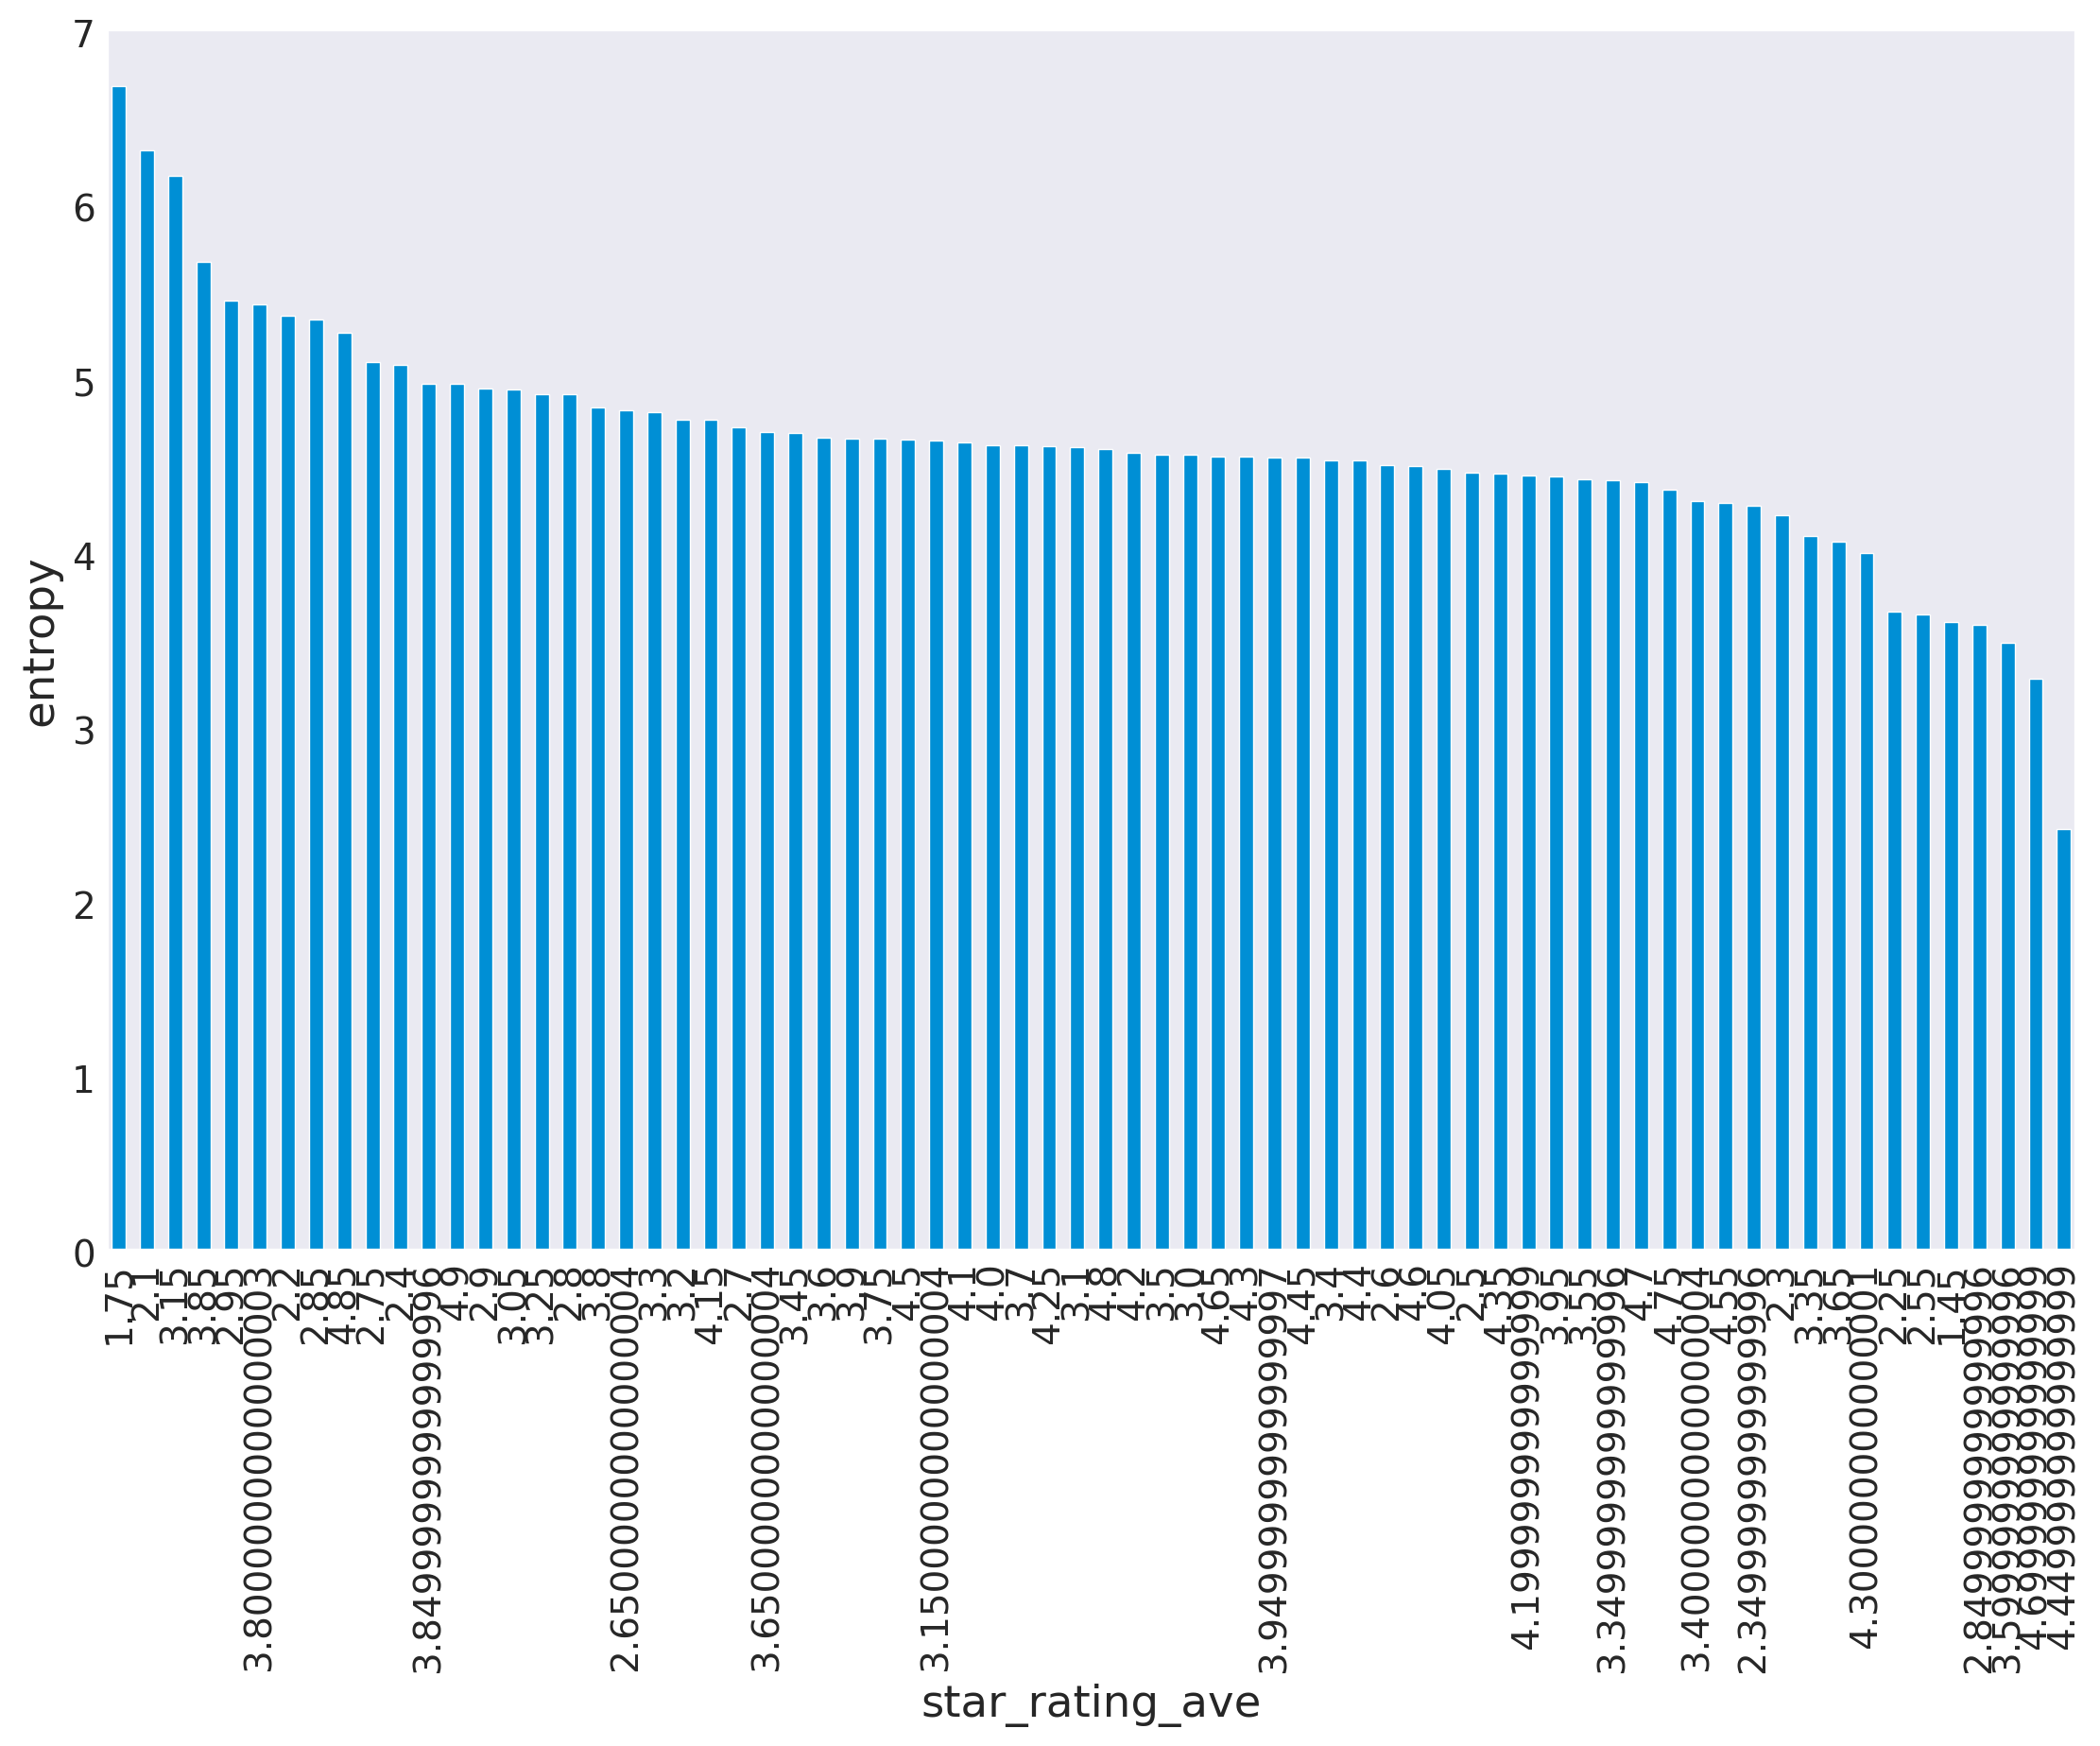

In [44]:
app_ui_exp.groupby('star_rating_ave')['gs_ent'].mean().sort_values(ascending=False).plot.bar(figsize=(12,8)).set_ylabel('entropy');

In [45]:
mean_rating = app_ui_exp.groupby('star_rating_ave')['gs_ent'].mean()

In [55]:
mean_rating_rd = mean_rating.round(2)

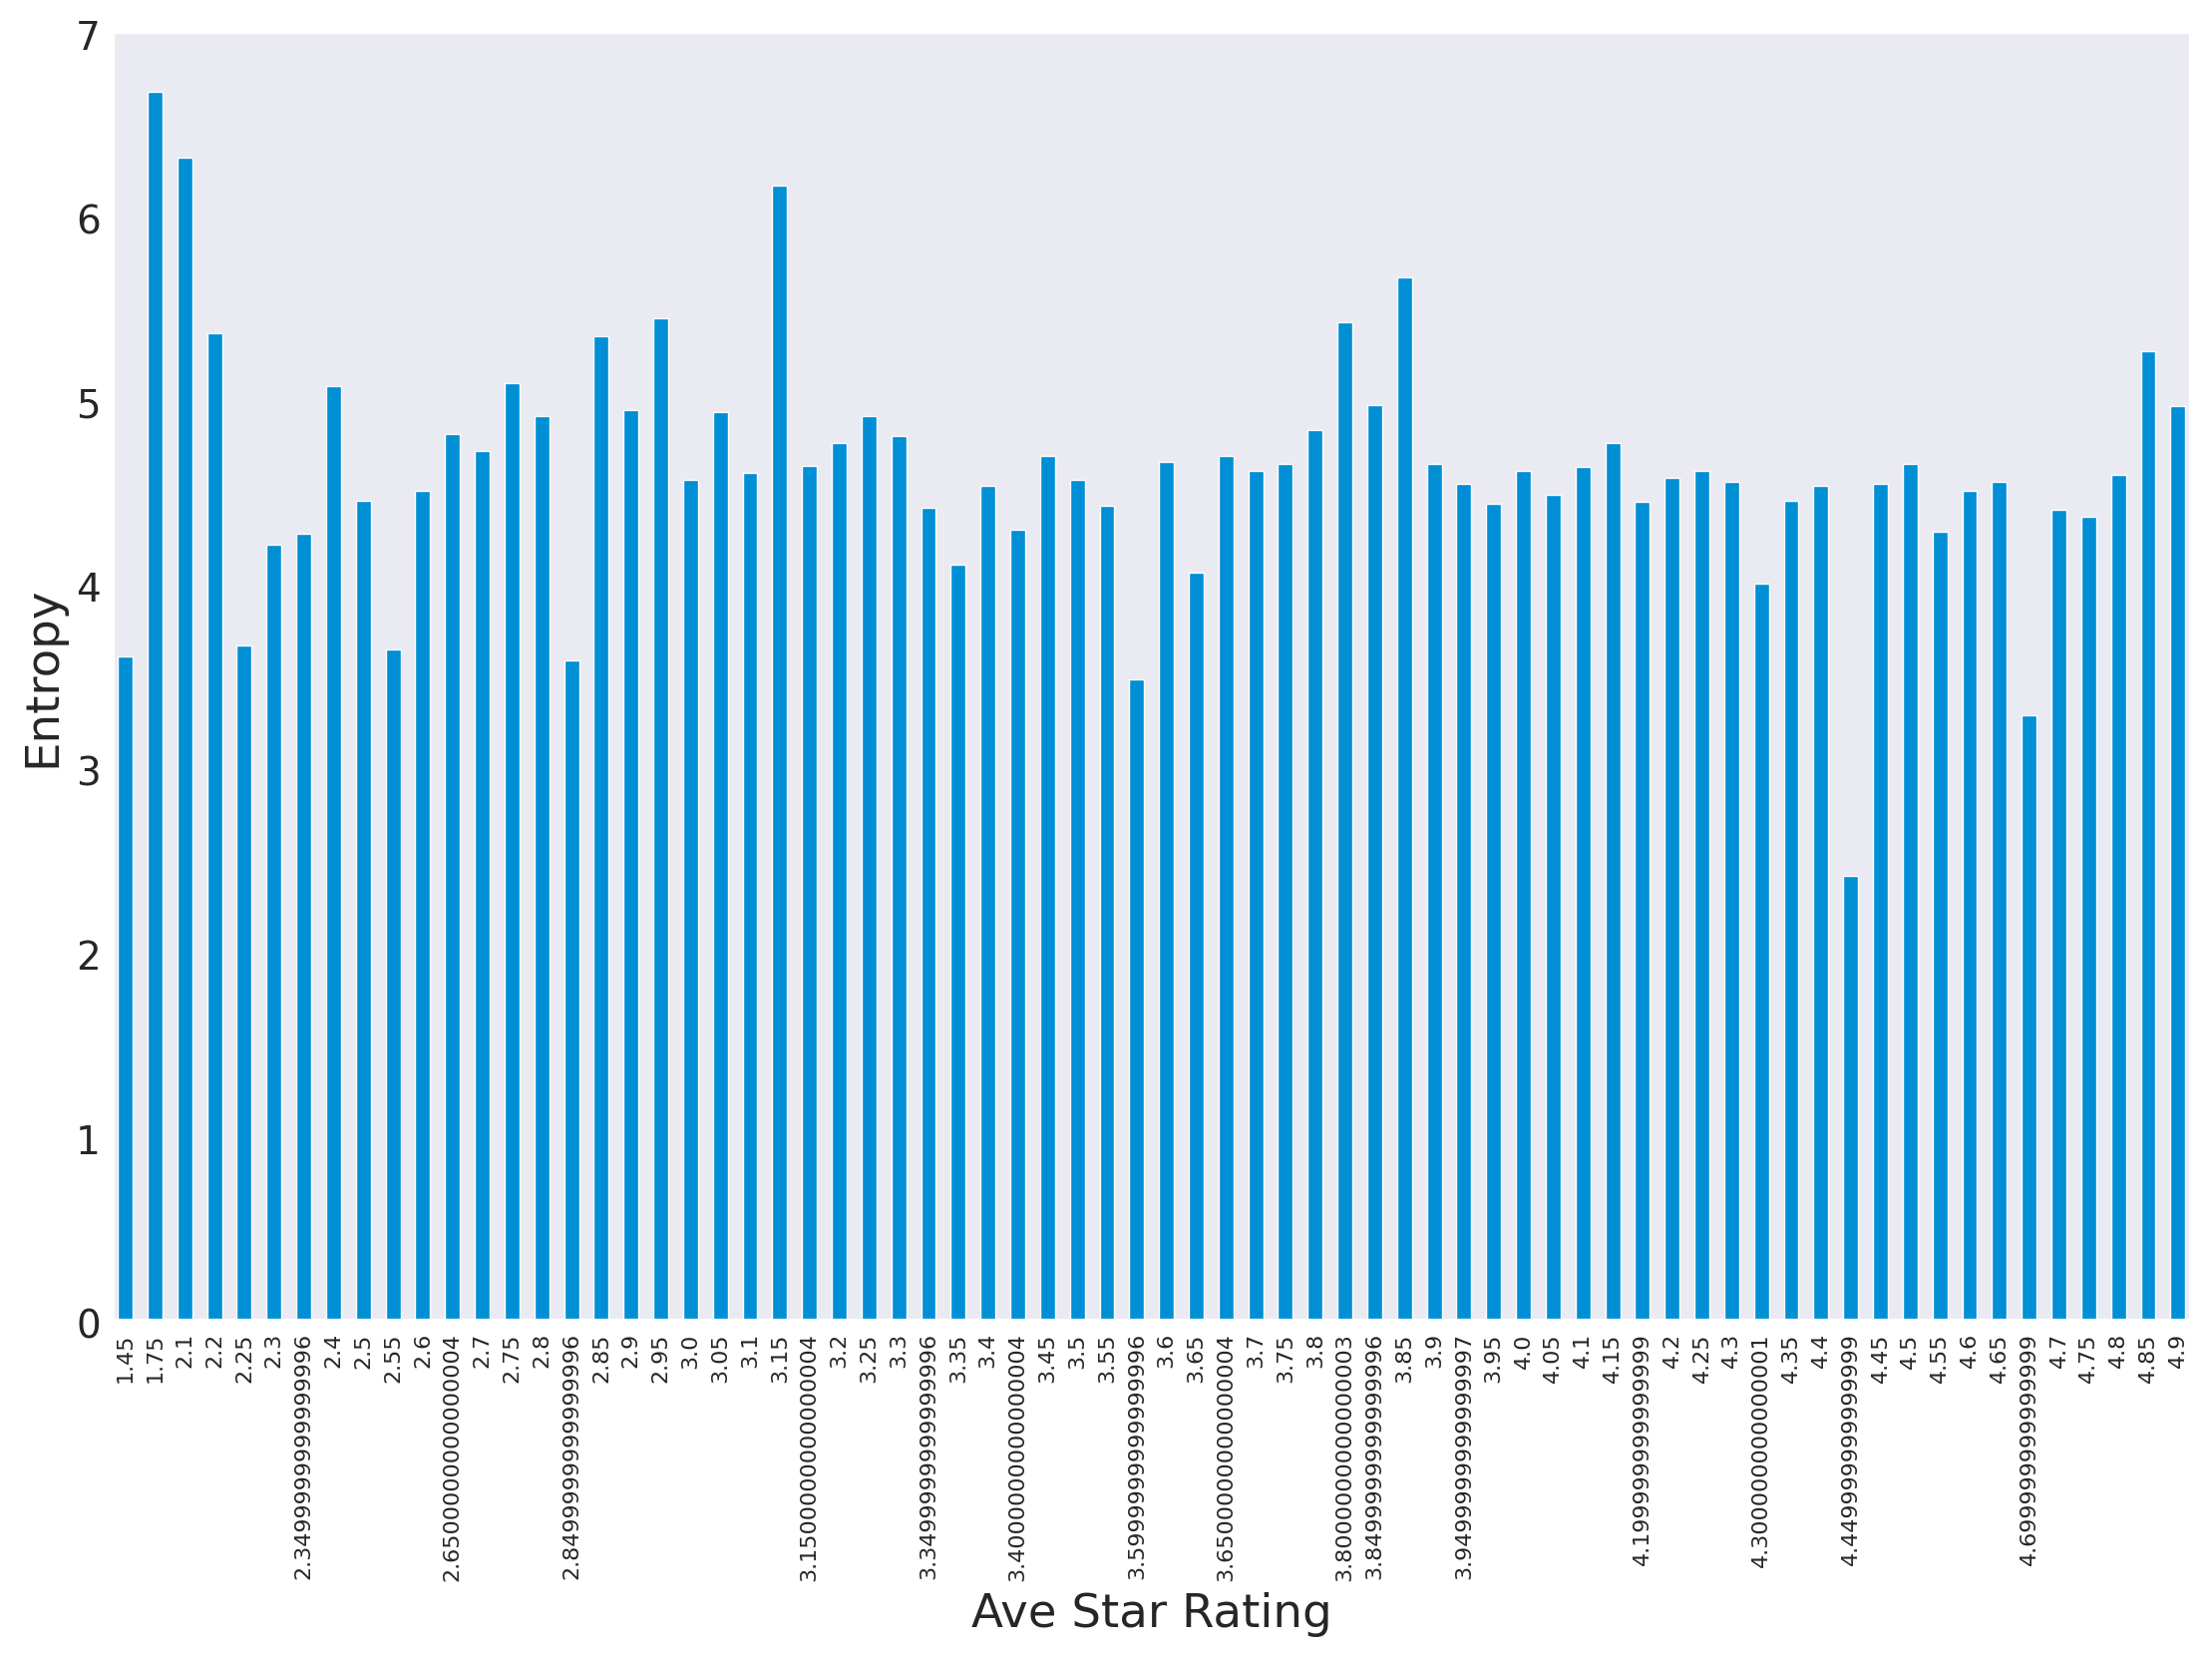

In [60]:
   import matplotlib.pyplot as plt


   plt.figure(figsize=(12, 8))

   mean_rating_rd.plot.bar()
   plt.xlabel('Ave Star Rating')
   plt.ylabel('Entropy')
   plt.xticks(fontsize=8)
  #  plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
  #  plt.tight_layout()

   plt.show()

#### Most poorly rated app

In [ ]:
app_ui_exp[app_ui_exp.star_rating_ave < 1.5].sort_values(by='gs_ent', ascending=True).head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent,info_gain
1901,co.inbox.messenger,Inbox Messenger: Chat Room App,Communication,1.45,3890.0,500000.0,"[../app_uis/30776.jpg, ../app_uis/30771.jpg, ....",26,../app_uis/30753.jpg,1080,1920,0.5625,../app_uis_resized/30753.jpg,"[6653, 861, 320, 54, 37, 22, 35, 37, 18, 22, 1...",2.310716,"[7685, 995, 633, 178, 177, 146, 130, 150, 114,...",3.768919,1.458203
1921,co.inbox.messenger,Inbox Messenger: Chat Room App,Communication,1.45,3890.0,500000.0,"[../app_uis/30776.jpg, ../app_uis/30771.jpg, ....",26,../app_uis/30773.jpg,1080,1920,0.5625,../app_uis_resized/30773.jpg,"[56283, 27617, 12203, 9088, 2334, 413, 53, 14,...",2.365556,"[8810, 16926, 50108, 2297, 6466, 11064, 8148, ...",3.938909,1.573352


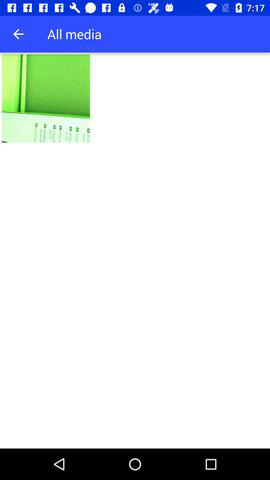

In [ ]:
PIL.Image.open(app_ui_exp.resized_file[1901])

#### Best rated app

In [ ]:
app_ui_exp[app_ui_exp.star_rating_ave > 4.4].sort_values(by='gs_ent', ascending=True).head(2)

,app_package_name,app_names,app_category,star_rating_ave,average_rating_ave,min_ratings_ave,filename_list,filename_num,filename_exp,img_w,img_h,aspect_ratio,resized_file,gs_histogram,gs_ent,c_histogram,c_ent,info_gain
13916,com.cowboys.attstadium.android,AT&T Stadium,Sports,4.60,1011.0,50000.0,"[../app_uis/8624.jpg, ../app_uis/8621.jpg, ../...",7,../app_uis/8624.jpg,1080,1920,0.5625,../app_uis_resized/8624.jpg,"[128963, 51, 50, 54, 37, 22, 35, 37, 18, 22, 1...",0.073849,"[128963, 51, 50, 54, 37, 22, 35, 37, 18, 22, 1...",1.658812,1.584963
61141,easy.to.read.bible.free,Easy to read Bible,Books & Reference,4.75,4342.0,100000.0,"[../app_uis/8844.jpg, ../app_uis/8842.jpg, ../...",14,../app_uis/8836.jpg,1080,1920,0.5625,../app_uis_resized/8836.jpg,"[128963, 51, 50, 54, 37, 22, 35, 37, 18, 22, 1...",0.073849,"[128963, 51, 50, 54, 37, 22, 35, 37, 18, 22, 1...",1.658812,1.584963


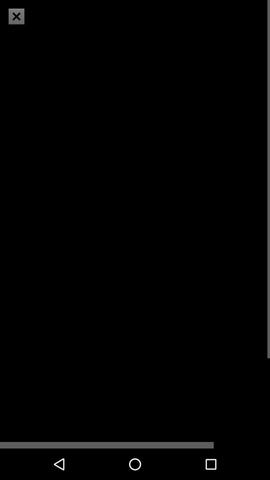

In [ ]:
PIL.Image.open(app_ui_exp.resized_file[14826])

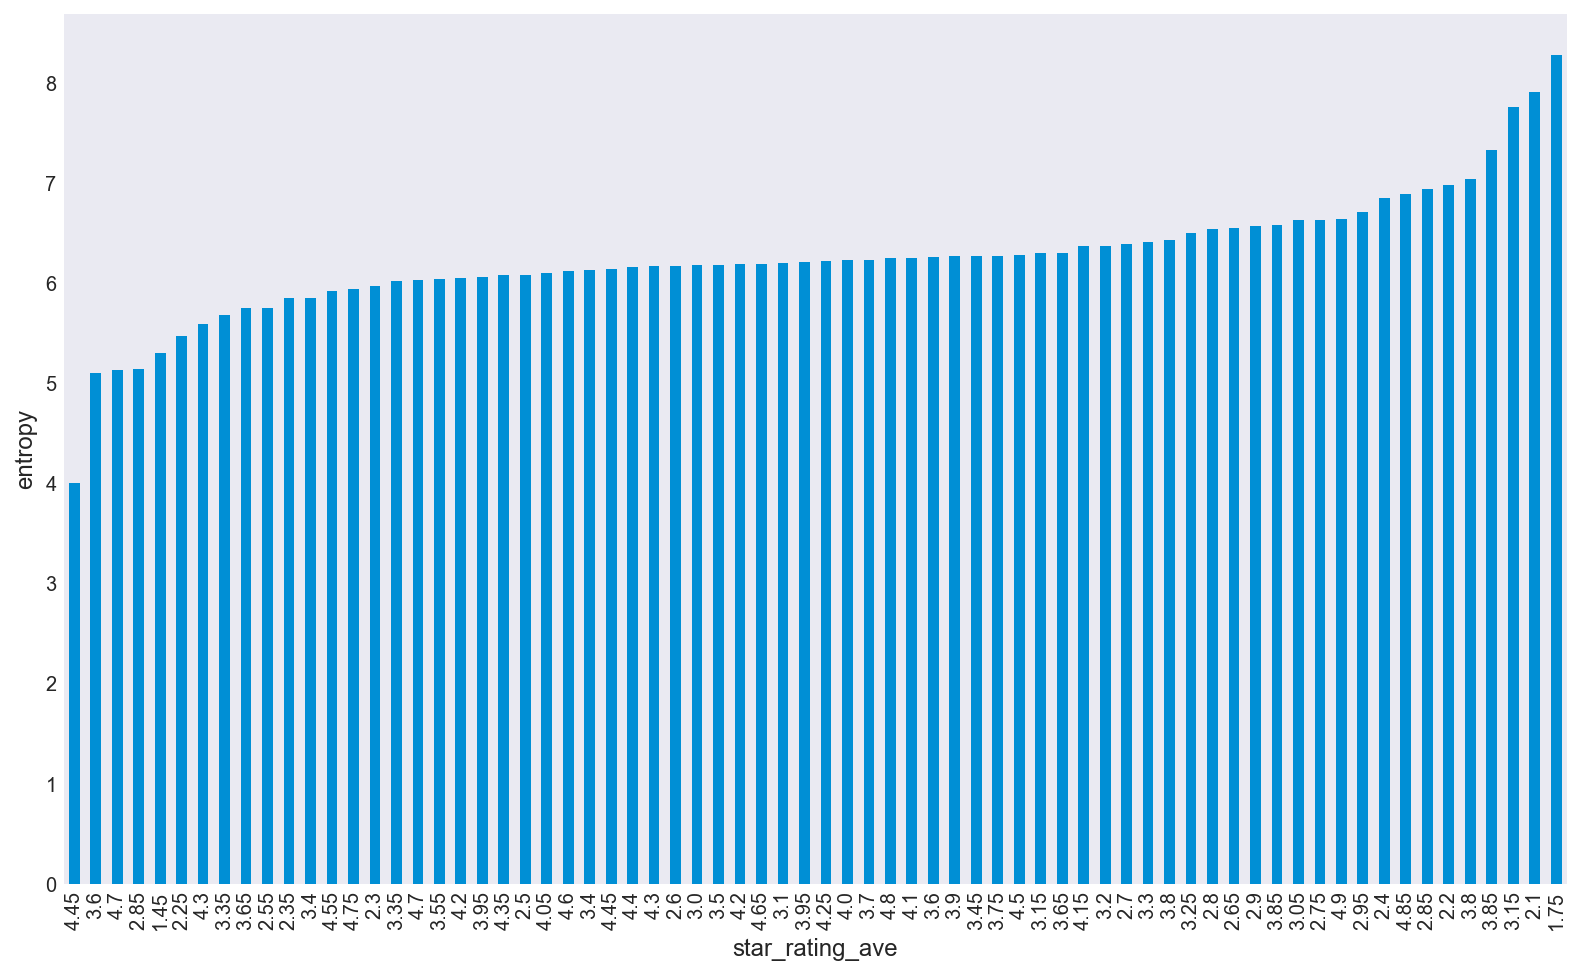

In [ ]:
app_ui_exp.groupby('star_rating_ave')['c_ent'].mean().sort_values().plot.bar(figsize=(12,8)).set_ylabel('entropy');

### Information Gain

In [ ]:
app_ui_exp.info_gain.describe()

count    70959.000000
mean         1.548292
std          0.151678
min          0.053565
25%          1.479022
50%          1.563807
75%          1.619920
max          3.234478
Name: info_gain, dtype: float64

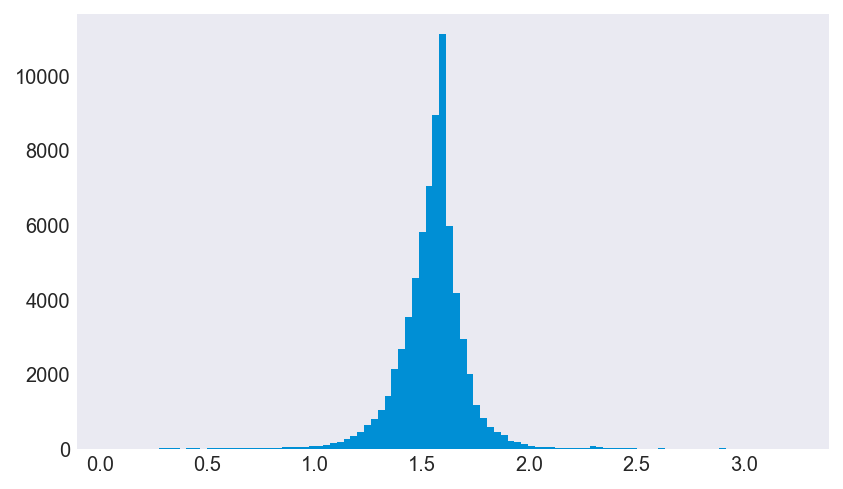

In [ ]:
plt.hist(app_ui_exp.info_gain, bins=100);

### Info gain with regards to app category

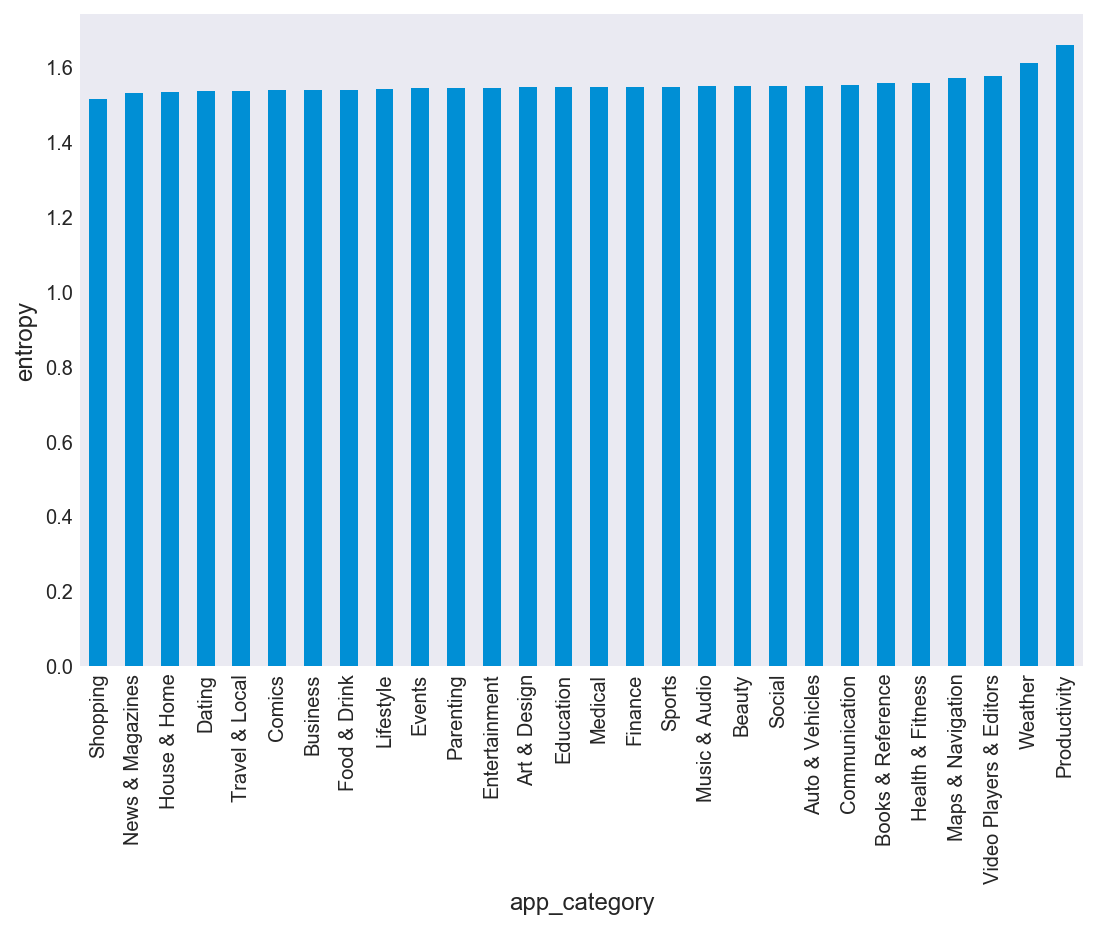

In [ ]:
app_ui_exp.groupby('app_category')['info_gain'].mean().sort_values().plot.bar(figsize=(8,6)).set_ylabel('entropy');

### Info gain with regards to star rating

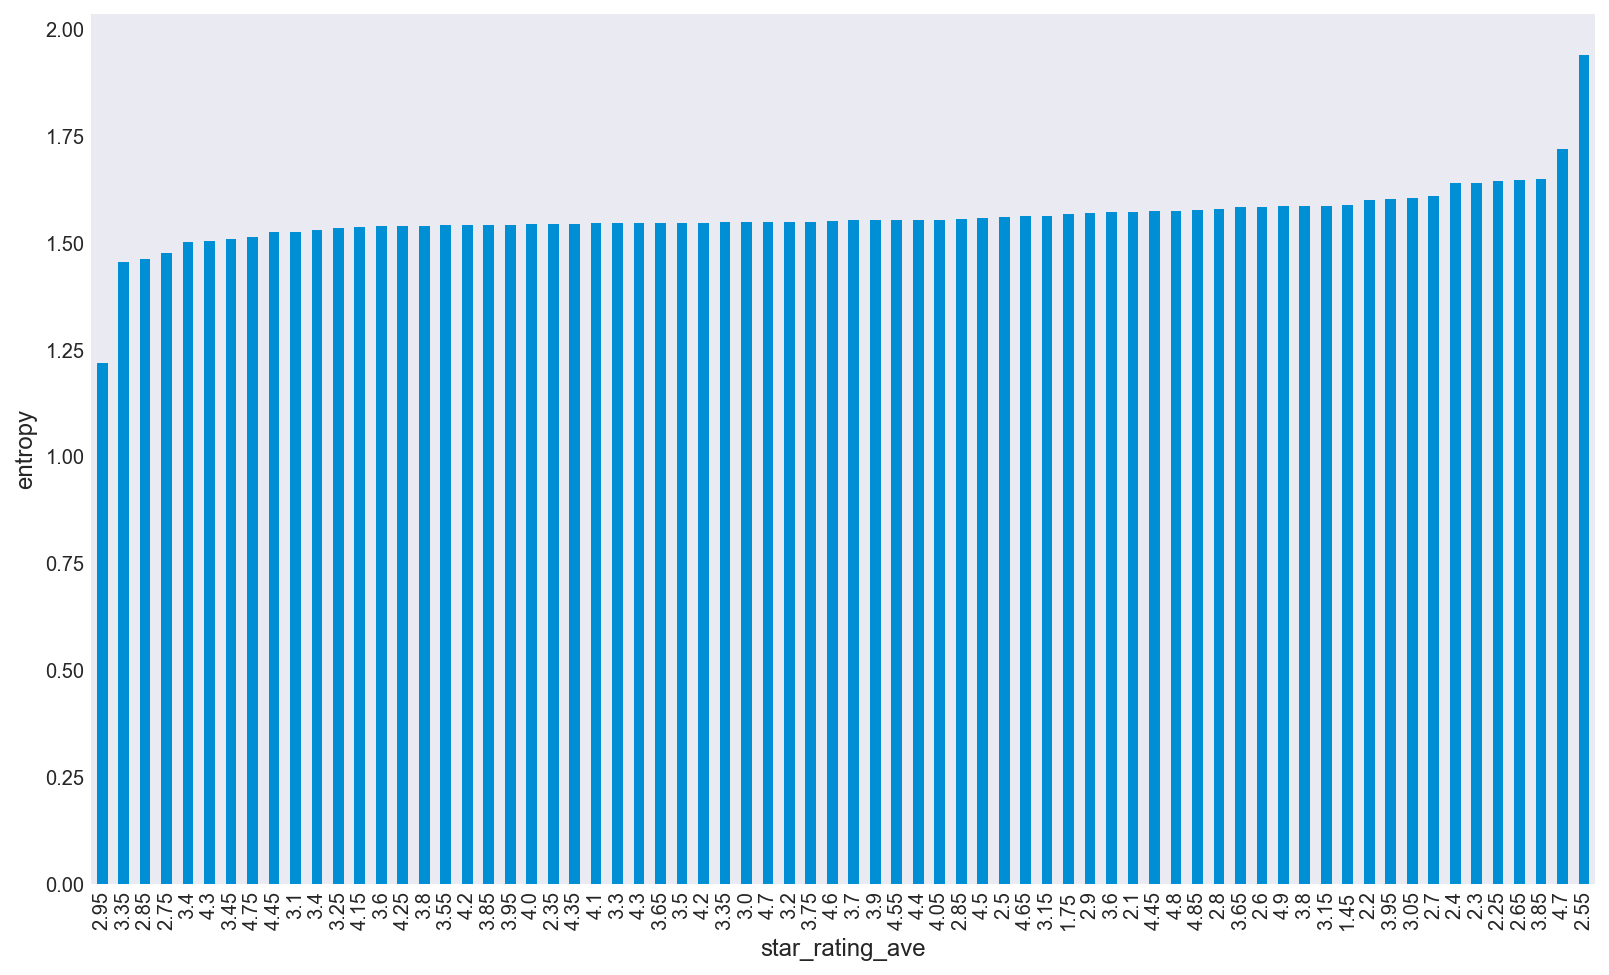

In [ ]:
app_ui_exp.groupby('star_rating_ave')['info_gain'].mean().sort_values().plot.bar(figsize=(12,8)).set_ylabel('entropy');